In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.util import img_as_float, img_as_ubyte
from skimage.exposure import equalize_hist, adjust_sigmoid
from skimage.filters import rank
from skimage.morphology import square

## Filters to remove background and improve contrast

Text(0.5, 1.0, 'Contrast Adjustment + Median Filter')

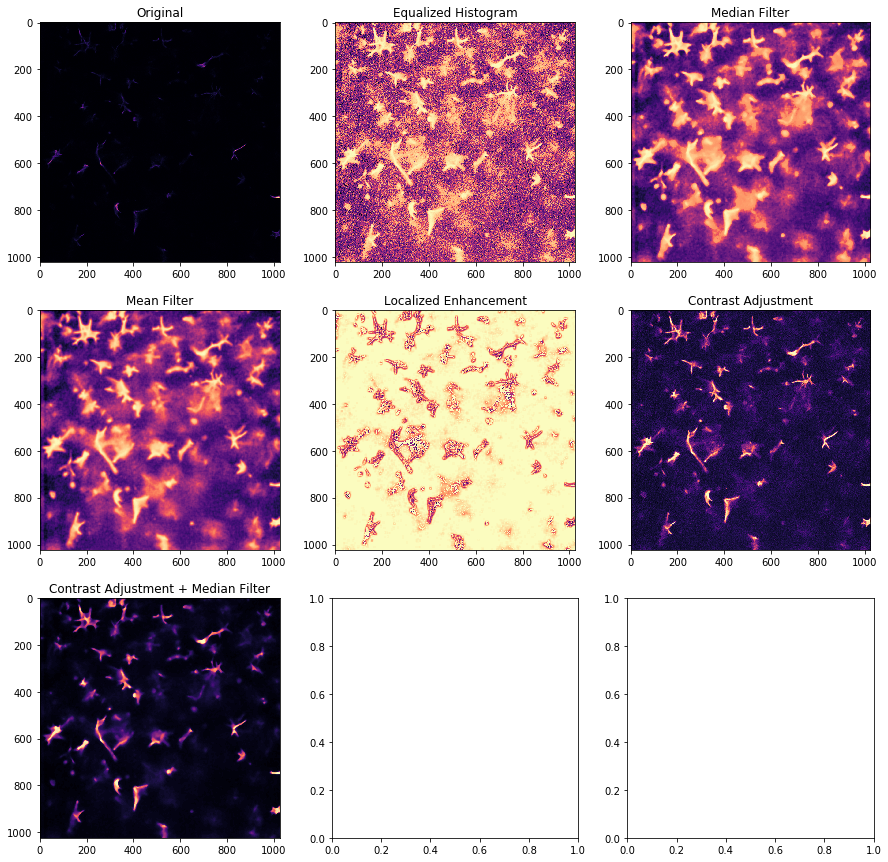

In [28]:
# original image
im_ch3 = img_as_float(io.imread('C3-NTG-CFbs_NTG5ECM_1mMRGD_20x_003.tif'))

#equalized histogram
im_ch3_eq = img_as_ubyte(equalize_hist(im_ch3, nbins=256))

# median and mean averaging filters
selem = square(10)
im_ch3_med = rank.median(im_ch3_eq[12], selem)
im_ch3_mean = rank.mean(im_ch3_eq[12], selem)

# localized enhancement
im_ch3_le = img_as_float(rank.equalize(im_ch3[12], selem=selem))

# contrast adjustment
im_ch3_sig = adjust_sigmoid(im_ch3[12], cutoff=0, gain=100, inv=False)

# contrast adjustment + median filter
im_ch3_sig_med = rank.median(im_ch3_sig, selem)

# plotting
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

ax[0,0].imshow(im_ch3[12], cmap='magma')
ax[0,0].set_title('Original')

ax[0,1].imshow(im_ch3_eq[12], cmap='magma')
ax[0,1].set_title('Equalized Histogram')

ax[0,2].imshow(im_ch3_med, cmap='magma')
ax[0,2].set_title('Median Filter')

ax[1,0].imshow(im_ch3_mean, cmap='magma')
ax[1,0].set_title('Mean Filter')

ax[1,1].imshow(im_ch3_le, cmap='magma')
ax[1,1].set_title('Localized Enhancement')

ax[1,2].imshow(im_ch3_sig, cmap='magma')
ax[1,2].set_title('Contrast Adjustment')

ax[2,0].imshow(im_ch3_sig_med, cmap='magma')
ax[2,0].set_title('Contrast Adjustment + Median Filter')

## Histograms of methods used above

Text(0.5, 1.0, 'Contrast Adjustment + Median Filter')

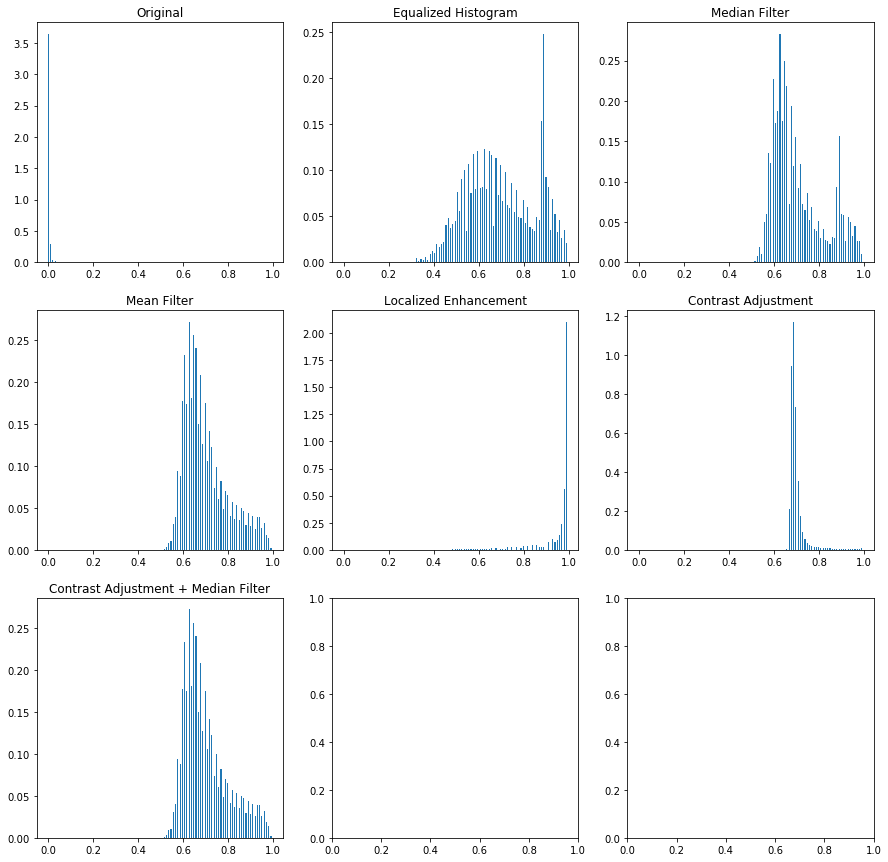

In [29]:
# histograms from various methods
hist1, bins1 = np.histogram(im_ch3[12], bins=np.linspace(0, 1, 100))
hist2, bins2 = np.histogram(img_as_float(im_ch3_eq[12]), bins=np.linspace(0, 1, 100))
hist3, bins3 = np.histogram(img_as_float(im_ch3_med), bins=np.linspace(0, 1, 100))
hist4, bins4 = np.histogram(img_as_float(im_ch3_mean), bins=np.linspace(0, 1, 100))
hist5, bins5 = np.histogram(img_as_float(im_ch3_le), bins=np.linspace(0, 1, 100))
hist6, bins6 = np.histogram(img_as_float(im_ch3_sig), bins=np.linspace(0, 1, 100))
hist7, bins7 = np.histogram(img_as_float(im_ch3_sig_med), bins=np.linspace(0, 1, 100))

# plotting
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

ax[0,0].bar(bins1[:-1], hist1/512**2, width=0.005)
ax[0,0].set_title('Original')

ax[0,1].bar(bins2[:-1], hist2/512**2, width=0.005)
ax[0,1].set_title('Equalized Histogram')

ax[0,2].bar(bins3[:-1], hist3/512**2, width=0.005)
ax[0,2].set_title('Median Filter')

ax[1,0].bar(bins4[:-1], hist4/512**2, width=0.005)
ax[1,0].set_title('Mean Filter')

ax[1,1].bar(bins5[:-1], hist5/512**2, width=0.005)
ax[1,1].set_title('Localized Enhancement')

ax[1,2].bar(bins6[:-1], hist6/512**2, width=0.005)
ax[1,2].set_title('Contrast Adjustment')

ax[2,0].bar(bins4[:-1], hist4/512**2, width=0.005)
ax[2,0].set_title('Contrast Adjustment + Median Filter')